In [87]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
np.set_printoptions(suppress=True)
from numpy.random import seed
from tensorflow import set_random_seed
from sklearn.datasets import load_boston

In [88]:
x,y = load_boston(return_X_y=True)
#x = preprocessing.MinMaxScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle = True, random_state=42)
n_features = x.shape[1]
print(x.shape)
print(x)

(506, 13)
[[  0.00632  18.        2.31    ...  15.3     396.9       4.98   ]
 [  0.02731   0.        7.07    ...  17.8     396.9       9.14   ]
 [  0.02729   0.        7.07    ...  17.8     392.83      4.03   ]
 ...
 [  0.06076   0.       11.93    ...  21.      396.9       5.64   ]
 [  0.10959   0.       11.93    ...  21.      393.45      6.48   ]
 [  0.04741   0.       11.93    ...  21.      396.9       7.88   ]]


In [89]:
seed(0)
set_random_seed(0)

model = Sequential()
model.add(Dense(15, input_dim = n_features, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(1, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
# compile the model
model.compile(optimizer='sgd', loss='mse')
# fit the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data =(x_test,y_test),verbose=0)

In [90]:
# evaluate the model
error = model.evaluate(x_test, y_test, verbose=0)
print('Error: ', error)

Error:  544.1288061084862


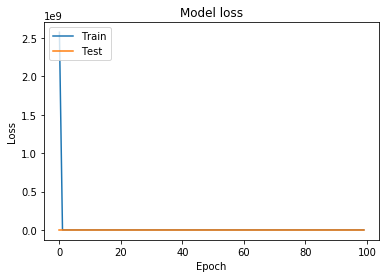

In [85]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [86]:
pred = model.predict(x_test)

for i in range(5):
    print(pred[i])

[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
